In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("="*60)
print(" Understanding Outliers")
print("="*60)

 Understanding Outliers


In [4]:
np.random.seed(42)
normal_salaries = np.random.normal(50000,15000,95) # Normal Employees
executive_salaries = np.array([250000,500000,750000,1000000,2000000])
all_salaries = np.concatenate([normal_salaries, executive_salaries])

In [5]:
print(" Salary Data:")
print(f"    Count: {len(all_salaries)}")
print(f"    Mean: ${all_salaries.mean():,.0f}")
print(f"    Median: ${np.median(all_salaries):,.0f}")
print(f"    Std Dev: ${all_salaries.std():,.0f}")


 Salary Data:
    Count: 100
    Mean: $91,113
    Median: $49,191
    Std Dev: $229,925


In [6]:
print(f"    Mean is ${all_salaries.mean() - np.median(all_salaries):,.0f} higher than the median!")

    Mean is $41,921 higher than the median!


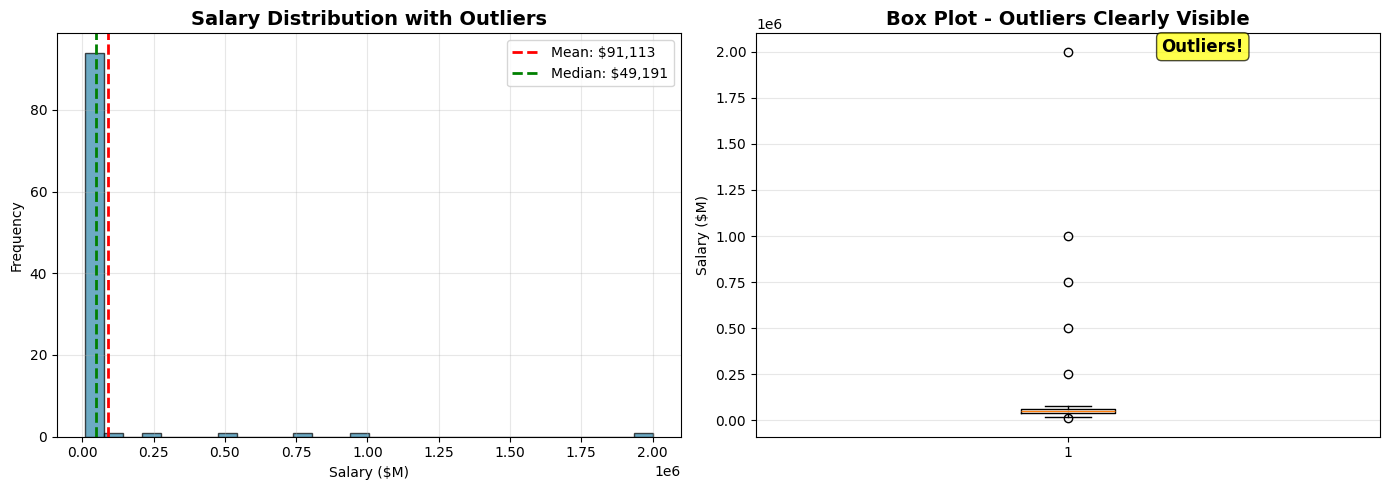


✓ Visualization shows outliers clearly!


In [7]:
# Visualize the problem
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(all_salaries, bins=30, color='#2E86AB', edgecolor='black', alpha=0.7)
axes[0].axvline(all_salaries.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${all_salaries.mean():,.0f}')
axes[0].axvline(np.median(all_salaries), color='green', linestyle='--', linewidth=2, label=f'Median: ${np.median(all_salaries):,.0f}')
axes[0].set_title('Salary Distribution with Outliers', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Salary ($M)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot (great for spotting outliers!)
axes[1].boxplot(all_salaries, vert=True)
axes[1].set_title('Box Plot - Outliers Clearly Visible', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Salary ($M)')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].text(1.15, 2000000, 'Outliers!', fontsize=12, fontweight='bold', 
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('outliers_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization shows outliers clearly!")

In [8]:
print("\n" + "="*60)
print(" IQR METHOD FOR OUTLIER DETECTION")
print("="*60)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    print(f"\n📊 {column} Analysis:")
    print(f"   Q1 (25th percentile): {Q1:,.2f}")
    print(f"   Q3 (75th percentile): {Q3:,.2f}")
    print(f"   IQR: {IQR:,.2f}")
    print(f"   Lower Bound: {lower_bound:,.2f}")
    print(f"   Upper Bound: {upper_bound:,.2f}")
    print(f"   Outliers Found: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")
    
    return outliers, lower_bound, upper_bound


 IQR METHOD FOR OUTLIER DETECTION


In [9]:
np.random.seed(42)
sales_data = pd.DataFrame({
    'Day': range(1, 101),
    'Sales': np.concatenate([
        np.random.normal(1000,200,95),  #Normal Days
        [5000,6000,7500,8000,10000]     # Black Friday, holidays, etc.
    ])
})

In [10]:
outliers, lower, upper = detect_outliers_iqr(sales_data, 'Sales')

print(f"\n Outlier Values:")
print(outliers[['Day', 'Sales']].to_string(index=False))


📊 Sales Analysis:
   Q1 (25th percentile): 885.62
   Q3 (75th percentile): 1,134.08
   IQR: 248.45
   Lower Bound: 512.95
   Upper Bound: 1,506.75
   Outliers Found: 6 (6.0%)

 Outlier Values:
 Day        Sales
  75   476.050979
  96  5000.000000
  97  6000.000000
  98  7500.000000
  99  8000.000000
 100 10000.000000


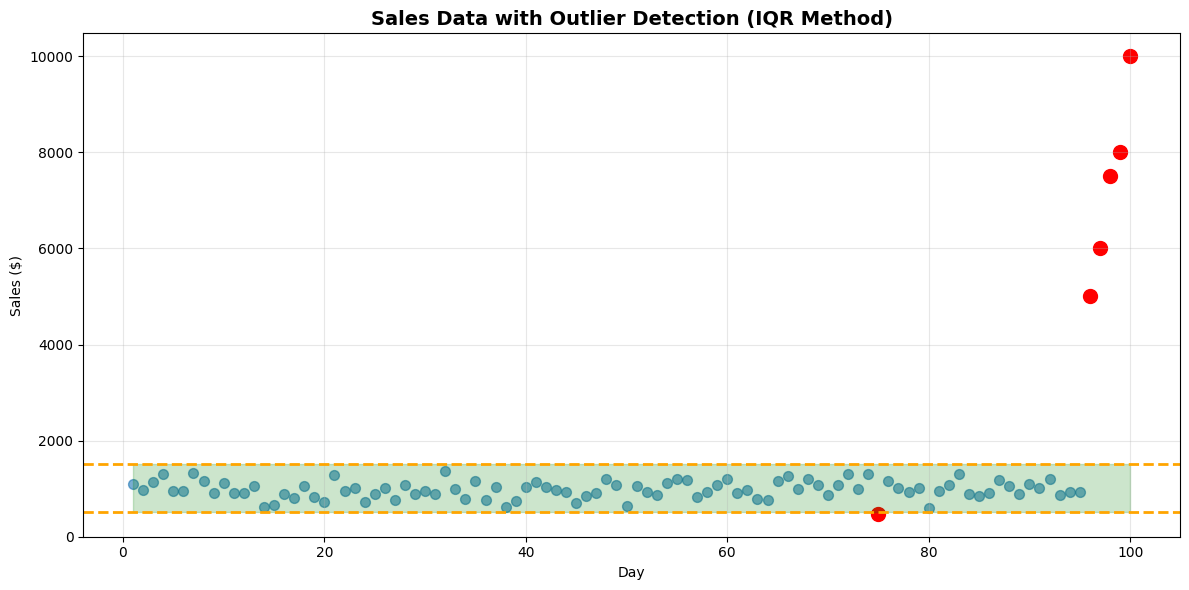


 Visualization saved!


In [11]:
plt.figure(figsize=(12,6))
plt.scatter(sales_data['Day'], sales_data['Sales'], alpha=0.6, s=50, label='Data Points')
plt.scatter(outliers['Day'], outliers['Sales'], color='red', s=100, label='Outliers')
plt.axhline(upper, color='orange', linestyle='--', linewidth=2, label=f'Upper Bound: ${upper:,.0f}')
plt.axhline(lower, color='orange', linestyle='--', linewidth=2, label=f'Lower Bound: ${lower:,.0f}')
plt.fill_between(sales_data['Day'], lower, upper, alpha=0.2, color='green', label='Normal Range')
plt.title('Sales Data with Outlier Detection (IQR Method)', fontsize=14, fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Sales ($)')
plt.legend
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('iqr_outlier_detection.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Visualization saved!")

** Method 2: Z-Score Method **

In [18]:
print("\n" + "="*60)
print(" Z-SCORE METHOD FOR OUTLIER DETECTION")
print("="*60)

def detect_outliers_zscore(data, column, threshold=3):
    """
    Detect outliers using Z-score
    
    WHY THIS WORKS:
    - Z-score = (value - mean) / std_dev
    - Tells you how many standard deviations from mean
    - Typically, |z-score| > 3 is an outlier
    """
    mean = data[column].mean()
    std = data[column].std()
    
    data['z_score'] = (data[column] - mean) / std
    outliers = data[abs(data['z_score']) > threshold]
    
    print(f"\n📊 {column} Z-Score Analysis:")
    print(f"   Mean: {mean:,.2f}")
    print(f"   Std Dev: {std:,.2f}")
    print(f"   Threshold: {threshold} standard deviations")
    print(f"   Outliers Found: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")
    
    return outliers

outliers_z = detect_outliers_zscore(sales_data.copy(), 'Sales', threshold=3)

print(f"\n🚨 Z-Score Outliers:")
print(outliers_z[['Day', 'Sales', 'z_score']].to_string(index=False))

print("\n💡 Comparing Methods:")
print(f"   IQR Method found: {len(outliers)} outliers")
print(f"   Z-Score Method found: {len(outliers_z)} outliers")
print("\n   IQR is more robust for skewed data")
print("   Z-Score assumes normal distribution")


 Z-SCORE METHOD FOR OUTLIER DETECTION

📊 Sales Z-Score Analysis:
   Mean: 1,296.50
   Std Dev: 1,448.35
   Threshold: 3 standard deviations
   Outliers Found: 4 (4.0%)

🚨 Z-Score Outliers:
 Day   Sales  z_score
  97  6000.0 3.247489
  98  7500.0 4.283151
  99  8000.0 4.628372
 100 10000.0 6.009255

💡 Comparing Methods:
   IQR Method found: 6 outliers
   Z-Score Method found: 4 outliers

   IQR is more robust for skewed data
   Z-Score assumes normal distribution



 STRATEGIES FOR HANDLING OUTLIERS

📊 Sales Analysis:
   Q1 (25th percentile): 885.62
   Q3 (75th percentile): 1,134.08
   IQR: 248.45
   Lower Bound: 512.95
   Upper Bound: 1,506.75
   Outliers Found: 6 (6.0%)

1️⃣ REMOVE OUTLIERS:
   Before: 100 rows
   After: 94 rows
   Removed: 6 rows
   New mean: $986

   ✓ Use when: Outliers are errors or don't represent your target population

2️⃣ CAP OUTLIERS (Winsorization):
   Capped values at bounds: [$513, $1,507]
   New mean: $1,007

   ✓ Use when: Outliers are real but you want to limit their influence

3️⃣ TRANSFORM DATA:
   Applied log transformation
   Original range: $476 - $10,000
   Log range: 6.17 - 9.21

   ✓ Use when: Outliers are real and important, but you need to reduce their influence

4️⃣ KEEP OUTLIERS:
   Sometimes outliers are the most interesting data!
   Examples:
   • Fraud detection - fraudulent transactions ARE outliers
   • Medical diagnosis - rare diseases show as outliers
   • Sales - Black Friday/holidays are outl

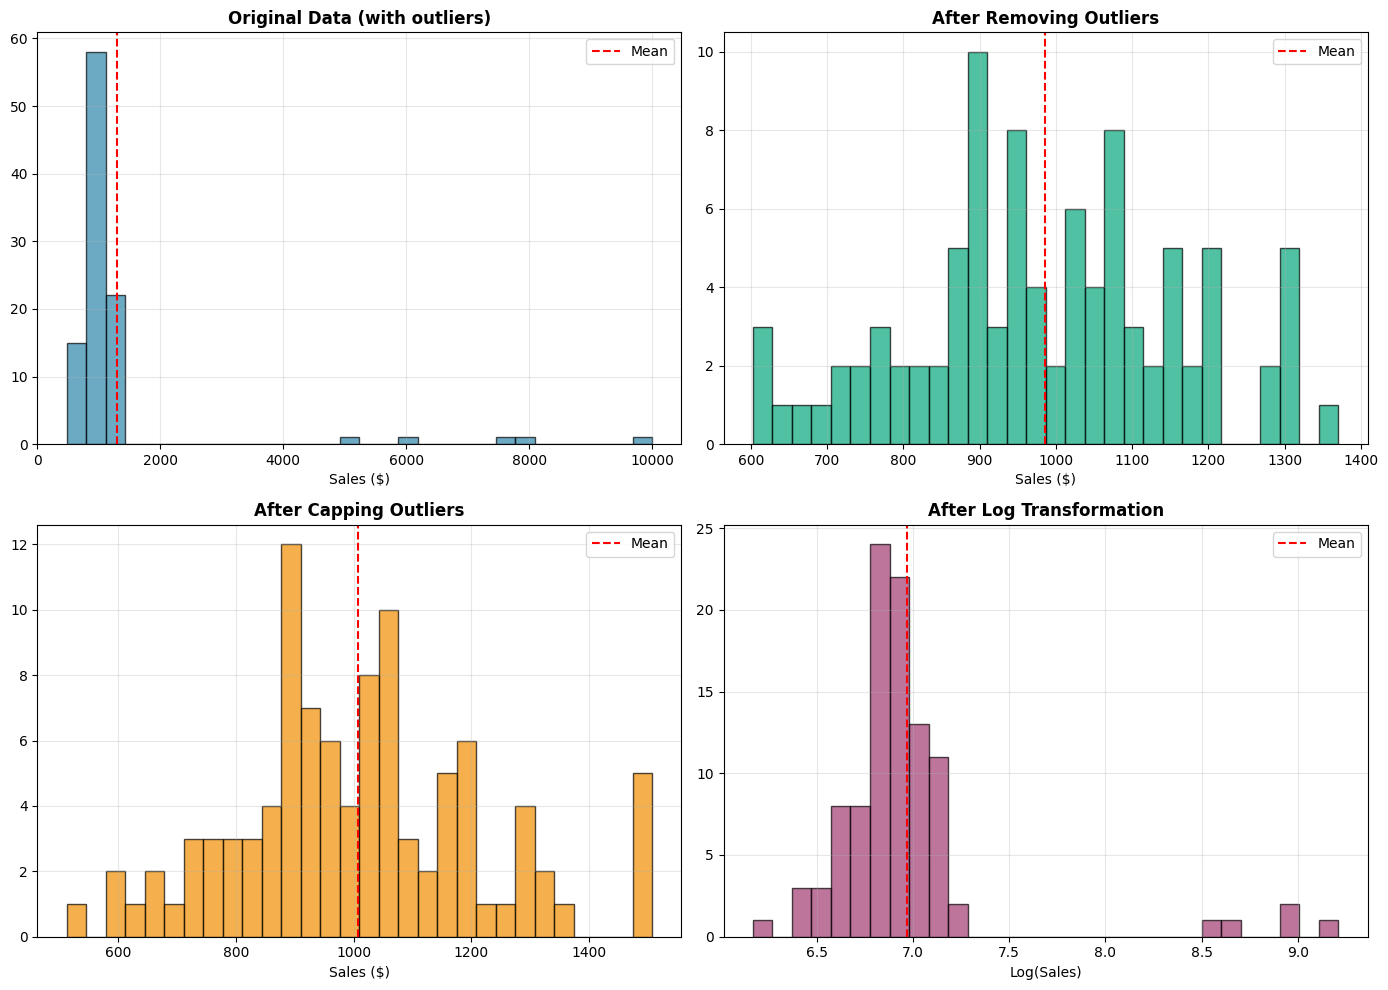


✓ Comparison saved!


In [19]:
print("\n" + "="*60)
print(" STRATEGIES FOR HANDLING OUTLIERS")
print("="*60)

# Prepare data
data_with_outliers = sales_data.copy()
outliers, lower, upper = detect_outliers_iqr(data_with_outliers, 'Sales')

# STRATEGY 1: Remove outliers
print("\n1️⃣ REMOVE OUTLIERS:")
data_removed = data_with_outliers[(data_with_outliers['Sales'] >= lower) & 
                                   (data_with_outliers['Sales'] <= upper)]
print(f"   Before: {len(data_with_outliers)} rows")
print(f"   After: {len(data_removed)} rows")
print(f"   Removed: {len(data_with_outliers) - len(data_removed)} rows")
print(f"   New mean: ${data_removed['Sales'].mean():,.0f}")
print("\n   ✓ Use when: Outliers are errors or don't represent your target population")

# STRATEGY 2: Cap outliers (winsorization)
print("\n2️⃣ CAP OUTLIERS (Winsorization):")
data_capped = data_with_outliers.copy()
data_capped.loc[data_capped['Sales'] > upper, 'Sales'] = upper
data_capped.loc[data_capped['Sales'] < lower, 'Sales'] = lower
print(f"   Capped values at bounds: [${lower:,.0f}, ${upper:,.0f}]")
print(f"   New mean: ${data_capped['Sales'].mean():,.0f}")
print("\n   ✓ Use when: Outliers are real but you want to limit their influence")

# STRATEGY 3: Transform data (log transformation)
print("\n3️⃣ TRANSFORM DATA:")
data_transformed = data_with_outliers.copy()
data_transformed['Sales_Log'] = np.log1p(data_transformed['Sales'])  # log(1 + x)
print(f"   Applied log transformation")
print(f"   Original range: ${data_with_outliers['Sales'].min():,.0f} - ${data_with_outliers['Sales'].max():,.0f}")
print(f"   Log range: {data_transformed['Sales_Log'].min():.2f} - {data_transformed['Sales_Log'].max():.2f}")
print("\n   ✓ Use when: Outliers are real and important, but you need to reduce their influence")

# STRATEGY 4: Keep outliers
print("\n4️⃣ KEEP OUTLIERS:")
print("   Sometimes outliers are the most interesting data!")
print("   Examples:")
print("   • Fraud detection - fraudulent transactions ARE outliers")
print("   • Medical diagnosis - rare diseases show as outliers")
print("   • Sales - Black Friday/holidays are outliers but very important")
print("\n   ✓ Use when: Outliers represent important real-world events")

# Visualize all strategies
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original
axes[0, 0].hist(data_with_outliers['Sales'], bins=30, color='#2E86AB', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Original Data (with outliers)', fontweight='bold')
axes[0, 0].set_xlabel('Sales ($)')
axes[0, 0].axvline(data_with_outliers['Sales'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Removed
axes[0, 1].hist(data_removed['Sales'], bins=30, color='#06A77D', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('After Removing Outliers', fontweight='bold')
axes[0, 1].set_xlabel('Sales ($)')
axes[0, 1].axvline(data_removed['Sales'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Capped
axes[1, 0].hist(data_capped['Sales'], bins=30, color='#F18F01', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('After Capping Outliers', fontweight='bold')
axes[1, 0].set_xlabel('Sales ($)')
axes[1, 0].axvline(data_capped['Sales'].mean(), color='red', linestyle='--', label='Mean')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Transformed
axes[1, 1].hist(data_transformed['Sales_Log'], bins=30, color='#A23B72', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('After Log Transformation', fontweight='bold')
axes[1, 1].set_xlabel('Log(Sales)')
axes[1, 1].axvline(data_transformed['Sales_Log'].mean(), color='red', linestyle='--', label='Mean')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outlier_strategies.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Comparison saved!")